In [3]:
import numpy as np
import matplotlib.pyplot as plt
from simulation_lib import *
import time

# plotting
def plot_b0_b1(mal, F1, F2, x0, x):
    plt.style.use('seaborn')
    plt.figure()
    plt.plot(mal, F1, marker='s', markersize=6, linewidth=4, label='D')
    plt.plot(mal, F2, marker='s', markersize=6, linewidth=4, linestyle='--', label='D\'')
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlabel('resources allocated to attacker', fontsize=22)
    plt.ylabel('frequency', fontsize=22)
    plt.legend(loc='best', fontsize=22)
    plt.grid(True)
    plt.savefig('geo2.pdf', bbox_inches="tight")
    plt.show()

Simulation of 100 million rounds for mechanism DGEO
Parameter: scale (s) = 1, $\miu$ (OFFSET) = 0 
Estimate Runtime: ~ 9 mins

0.0
10.0
20.0
30.0
40.0
50.0
60.0
70.0
80.0
90.0
(miu,s) =  0 1


/var/folders/x9/z2pzxf912fdcy7630673mhg40000gn/T/ipykernel_4591/3338991625.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


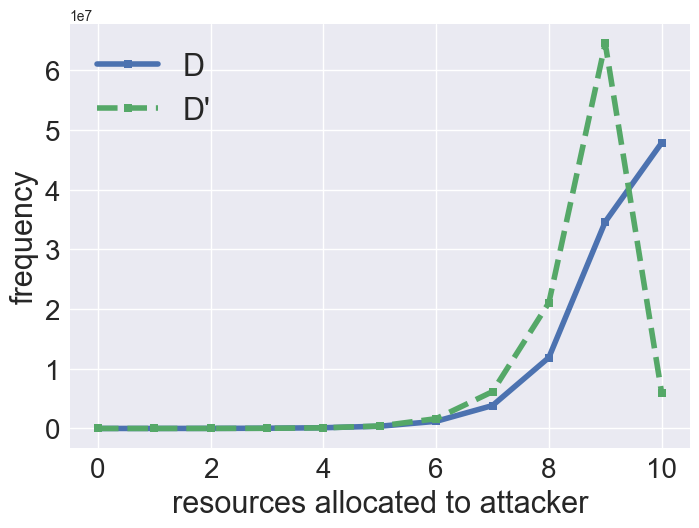

utility: 0.9220827670000008
total time (secs) for this cell:  572.2105102539062


In [9]:
# Parameter default setup
start = time.time()
x = 100
x0 = 0
p = 0
c = 0
lamda = 0


noise_type = 'geometric2'
RD = 100000000
k = 10  # resource capacity
m = k  # best strategy

result = []
utility = []

el_all = []
ul_all = []
s_all = []
miu_all = []
S = [1]
OFFSET = [0]
for miu in OFFSET:
    for s in S:
        F = []
        F_prime = []
        a = []
        b = []
        uti = []
        for rd in range(RD):
            # add noise to neighboring dataset D and D'
            f, f_prime = add_noise(x0=x0, k=k, m=m, noise_type=noise_type, x=x, p=p, c=c, lamda=lamda, miu=miu, s=s)
            F.append(f)
            F_prime.append(f_prime)
            # allocate resources to concurrent requests 
            ra_f, ra_f_p, u = allocation(f=f, f_prime=f_prime, m=m, k=k)
            a.append(ra_f)
            b.append(ra_f_p)
            uti.append(u)
            if rd % 10000000 == 0:
                print("\r{0}".format((float(rd) / RD) * 100))

        # calculate average utility of all rounds of simulation
        utility.append(np.mean(uti))
        # counting number of resources allocated to attacker before and after RA
        Before_RA_F, Before_RA_F_p = counter_process(F= F, F_prime=F_prime)
        After_RA_F, After_RA_F_p = counter_process(F=a, F_prime=b)
        print("(miu,s) = ", miu, s)
        plot_b0_b1(range(11), After_RA_F, After_RA_F_p, miu, s)
        # r1 = non_inf(np.log(find_max(Before_RA_F, Before_RA_F_p)))
        # print('max index before RA (y):', r1.index(max(r1))- abs(min(0, min(min(F), min(F_prime)))))
        # print(str(noise_type)+" - Simulation (k = " + str(k) +"), before RA:", max(r1))
        # r2 = non_inf(np.log(find_max(After_RA_F, After_RA_F_p)))
        # print('max index (y):', r2.index(max(r2)))
        # print(str(noise_type) + " - Simulation (k = " + str(k) + "), after RA:", max(r2))
        # result.append(max(r2))
        print("utility:", np.mean(uti))

print("total time (secs) for this cell: ", time.time() - start)

Simulation of 5 million rounds for mechanism DGEO
Parameter: scale (s) = 1, $\miu$ (OFFSET) = 0 
Estimate Runtime: ~ 30 secs

In [7]:
# Parameter default setup
# prep for histogram
x = 0
x0 = 0
p = 0
c = 0
lamda = 0


noise_type = 'geometric2'
RD = 5000000
k = 10  # resource capacity
m = k  # best strategy

result = []
utility = []

el_all = []
ul_all = []
s_all = []
miu_all = []
S = [1]
OFFSET = [0]
for miu in OFFSET:
    for s in S:
        F = []
        F_prime = []
        a = []
        b = []
        uti = []
        for rd in range(RD):
            # add noise to neighboring dataset D and D'
            f, f_prime = add_noise(x0=x0, k=k, m=m, noise_type=noise_type, x=x, p=p, c=c, lamda=lamda, miu=miu, s=s)
            F.append(f)
            F_prime.append(f_prime)
            # allocate resources to requests 
            ra_f, ra_f_p, u = allocation(f=f, f_prime=f_prime, m=m, k=k)
            a.append(ra_f)
            b.append(ra_f_p)
            uti.append(u)
            if rd % 500000 == 0:
                print("\r{0}".format((float(rd) / RD) * 100))
        # calculate average utility of all rounds of simulation
        utility.append(np.mean(uti))
        Before_RA_F, Before_RA_F_p = counter_process(F= F, F_prime=F_prime)
        After_RA_F, After_RA_F_p = counter_process(F=a, F_prime=b)
        print("(miu,s) = ", miu, s)
        # r1 = non_inf(np.log(find_max(Before_RA_F, Before_RA_F_p)))
        # print('max index before RA (y):', r1.index(max(r1))- abs(min(0, min(min(F), min(F_prime)))))
        # print(str(noise_type)+" - Simulation (k = " + str(k) +"), before RA:", max(r1))
        # r2 = non_inf(np.log(find_max(After_RA_F, After_RA_F_p)))
        # print('max index (y):', r2.index(max(r2)))
        # print(str(noise_type) + " - Simulation (k = " + str(k) + "), after RA:", max(r2))
        # result.append(max(r2))
        print("utility:", np.mean(uti))

0.0
10.0
20.0
30.0
40.0
50.0
60.0
70.0
80.0
90.0
(miu,s) =  0 1
utility: 0.9221118200000005


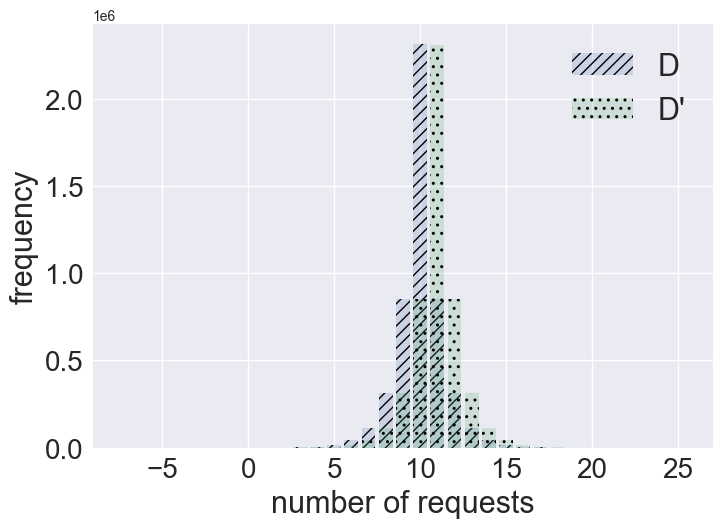

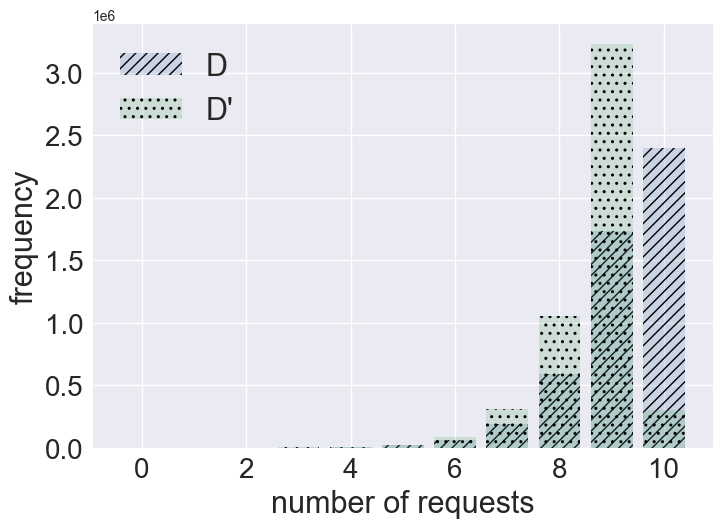

In [8]:
# histogram of output before RA
fc = Counter(F)
fcp = Counter(F_prime)
plt.figure()
plt.bar(fc.keys(), fc.values(), alpha = 0.2, label='D', fill=True, hatch='///')
plt.bar(fcp.keys(), fcp.values(), alpha = 0.2, label='D\'', fill=True, hatch='..')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc='best',fontsize=22)
plt.xlabel('number of requests', fontsize=22)
plt.ylabel('frequency', fontsize=22)
plt.savefig('hist_before.png', bbox_inches = "tight")

# histogram of output after RA
fc = Counter(a)
fcp = Counter(b)
plt.figure()
plt.bar(fc.keys(), fc.values(), alpha = 0.2, label='D', fill=True, hatch='///')
plt.bar(fcp.keys(), fcp.values(), alpha = 0.2, label='D\'', fill=True, hatch='..')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc='best',fontsize=22)
plt.xlabel('number of requests', fontsize=22)
plt.ylabel('frequency', fontsize=22)
plt.savefig('hist_after.png', bbox_inches = "tight")